# Qiskit Aer
* Updated on 11/15/2023

## Simulating your first quantum program with Qiskit Aer
https://qiskit.org/ecosystem/aer/getting_started.html

In [1]:
import numpy as np
import qiskit
from qiskit_aer import AerSimulator
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

In [2]:
# import qiskit
# from qiskit_aer import AerSimulator

# Generate 3-qubit GHZ state
circ = qiskit.QuantumCircuit(3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure_all()
circ.draw()

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────────░─┤M├──────
        └───┘┌─┴─┐      ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──■───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas: 3/═══════════════════╩══╩══╩═
                           0  1  2

In [3]:
# Construct an ideal simulator
aersim = AerSimulator()

# Perform an ideal simulation
result_ideal = qiskit.execute(circ, aersim).result()
counts_ideal = result_ideal.get_counts(0)
print('Counts(ideal):', counts_ideal)
# Counts(ideal): {'000': 493, '111': 531}

Counts(ideal): {'000': 507, '111': 517}


## Simulators

In [4]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

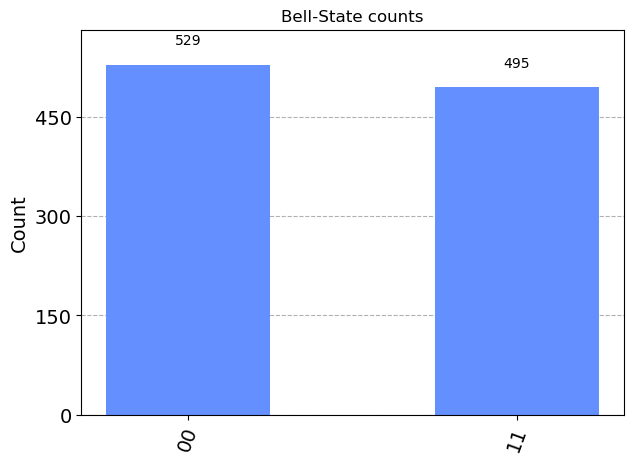

In [5]:
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
# circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [6]:
# Run and get memory
result = simulator.run(circ, shots=20, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['11', '00', '00', '11', '00', '00', '00', '00', '11', '11', '00', '11', '00', '00', '00', '00', '00', '00', '00', '11']


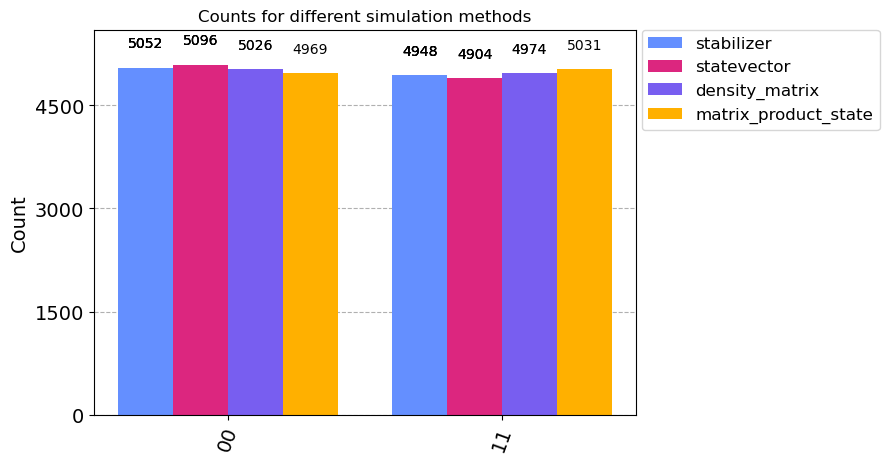

In [7]:
# Increase shots to reduce sampling variance
shots = 10000

# Stabilizer simulation method
sim_stabilizer = Aer.get_backend('aer_simulator_stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)

# Statevector simulation method
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Density Matrix simulation method
sim_density = Aer.get_backend('aer_simulator_density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = Aer.get_backend('aer_simulator_matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)

plot_histogram([counts_stabilizer, counts_statevector, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=['stabilizer', 'statevector',
                       'density_matrix', 'matrix_product_state'])

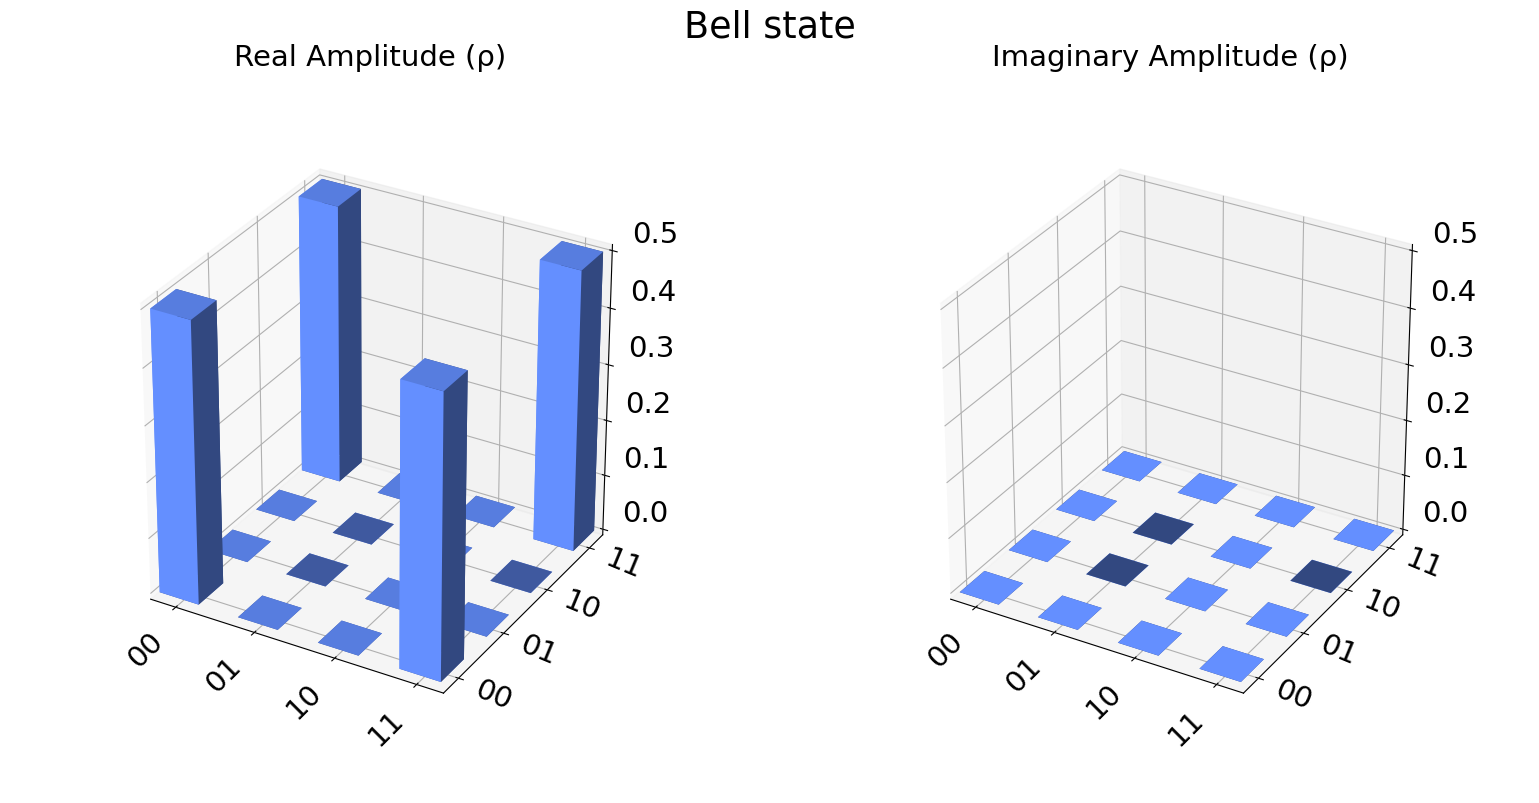

In [8]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_statevector()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get statevector
result = simulator.run(circ).result()
statevector = result.get_statevector(circ)
plot_state_city(statevector, title='Bell state')

In [9]:
# Construct quantum circuit without measure
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.save_unitary()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get unitary
result = simulator.run(circ).result()
unitary = result.get_unitary(circ)
print("Circuit unitary:\n", np.asarray(unitary).round(5))

Circuit unitary:
 [[ 0.70711+0.j  0.70711+0.j  0.     +0.j  0.     +0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j -0.70711-0.j]
 [ 0.     +0.j  0.     +0.j  0.70711+0.j  0.70711+0.j]
 [ 0.70711+0.j -0.70711-0.j  0.     +0.j  0.     +0.j]]


## Device backend noise model simulations
* Single-qubit gate errors consisting of a single qubit depolarizing error followed by a single qubit thermal relaxation error.
* Two-qubit gate errors consisting of a two-qubit depolarizing error followed by single-qubit thermal relaxation errors on both qubits in the gate.
* Single-qubit readout errors on the classical bit value obtained from measurements on individual qubits.

In [10]:
# import qiskit
# from qiskit_aer import AerSimulator
# import numpy as np
# from qiskit import QuantumCircuit
# from qiskit import Aer, transpile
# from qiskit.tools.visualization import plot_histogram, plot_state_city
# import qiskit.quantum_info as qi

In [11]:
# Construct quantum circuit
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])
circ.draw()

┌───┐          ┌─┐      
q_0: ┤ H ├──■───────┤M├──────
     └───┘┌─┴─┐     └╥┘┌─┐   
q_1: ─────┤ X ├──■───╫─┤M├───
          └───┘┌─┴─┐ ║ └╥┘┌─┐
q_2: ──────────┤ X ├─╫──╫─┤M├
               └───┘ ║  ║ └╥┘
c: 3/════════════════╩══╩══╩═
                     0  1  2

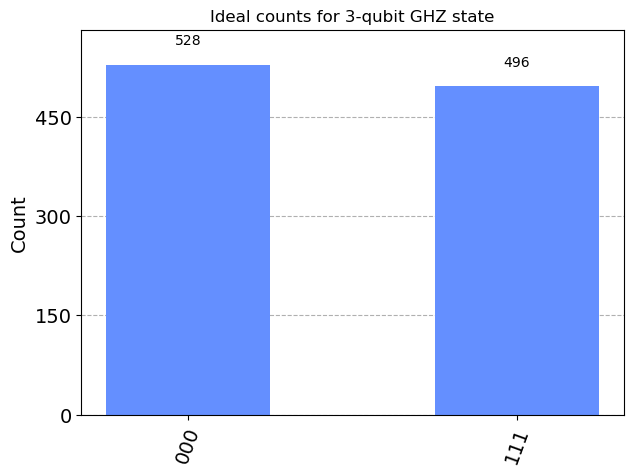

In [12]:
sim_ideal = AerSimulator()

# Execute and get counts
result = sim_ideal.run(transpile(circ, sim_ideal)).result()
counts = result.get_counts(0)
plot_histogram(counts, title='Ideal counts for 3-qubit GHZ state')

In [13]:
from qiskit.providers.fake_provider import FakeVigo
device_backend = FakeVigo()
sim_vigo = AerSimulator.from_backend(device_backend)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_vigo)
tcirc.draw()

global phase: π/4
               ┌─────────┐┌────┐┌─────────┐          ┌─┐      
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───────┤M├──────
               └─────────┘└────┘└─────────┘┌─┴─┐     └╥┘┌─┐   
      q_1 -> 1 ────────────────────────────┤ X ├──■───╫─┤M├───
                                           └───┘┌─┴─┐ ║ └╥┘┌─┐
      q_2 -> 2 ─────────────────────────────────┤ X ├─╫──╫─┤M├
                                                └───┘ ║  ║ └╥┘
ancilla_0 -> 3 ───────────────────────────────────────╫──╫──╫─
                                                      ║  ║  ║ 
ancilla_1 -> 4 ───────────────────────────────────────╫──╫──╫─
                                                      ║  ║  ║ 
          c: 3/═══════════════════════════════════════╩══╩══╩═
                                                      0  1  2

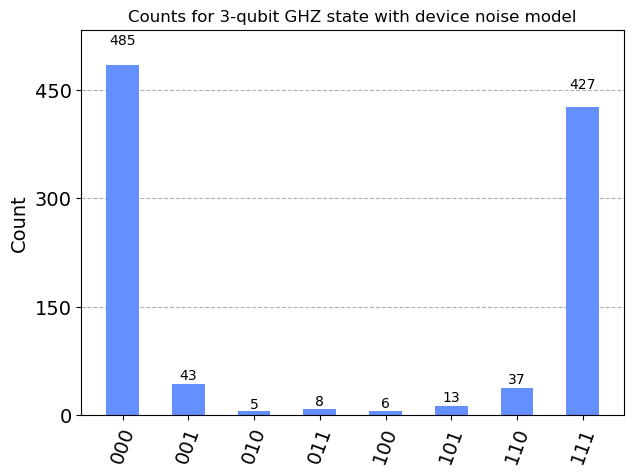

In [14]:
# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise,
               title="Counts for 3-qubit GHZ state with device noise model")

In [15]:
# Construct quantum circuit
circ = QuantumCircuit(3, 3)
circ.h(0)
# circ.barrier([0,1,2])
circ.cx(0, 1)
circ.cx(1, 2)
circ.barrier([0,1,2])
circ.delay(1e-4, unit='s')
circ.barrier([0,1,2])
circ.measure([0, 1, 2], [0, 1, 2])
circ.draw()

┌───┐           ░ ┌──────────────────┐ ░ ┌─┐      
q_0: ┤ H ├──■────────░─┤ Delay(0.0001[s]) ├─░─┤M├──────
     └───┘┌─┴─┐      ░ ├──────────────────┤ ░ └╥┘┌─┐   
q_1: ─────┤ X ├──■───░─┤ Delay(0.0001[s]) ├─░──╫─┤M├───
          └───┘┌─┴─┐ ░ ├──────────────────┤ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░─┤ Delay(0.0001[s]) ├─░──╫──╫─┤M├
               └───┘ ░ └──────────────────┘ ░  ║  ║ └╥┘
c: 3/══════════════════════════════════════════╩══╩══╩═
                                               0  1  2

In [16]:
from qiskit.providers.fake_provider import FakePerth
from qiskit_aer.noise import NoiseModel

noise_model = NoiseModel.from_backend(
    FakePerth(), thermal_relaxation=True, gate_error=False, readout_error=False
)
sim_noise = AerSimulator.from_backend(FakePerth(), noise_model=noise_model)

# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_noise)
tcirc.draw()

global phase: π/4
               ┌─────────┐┌────┐┌─────────┐           ░ ┌──────────────────┐ ░ »
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■────────░─┤ Delay(0.0001[s]) ├─░─»
               └─────────┘└────┘└─────────┘┌─┴─┐      ░ ├──────────────────┤ ░ »
      q_1 -> 1 ────────────────────────────┤ X ├──■───░─┤ Delay(0.0001[s]) ├─░─»
                                           └───┘┌─┴─┐ ░ ├──────────────────┤ ░ »
      q_2 -> 2 ─────────────────────────────────┤ X ├─░─┤ Delay(0.0001[s]) ├─░─»
                                                └───┘ ░ └──────────────────┘ ░ »
ancilla_0 -> 3 ────────────────────────────────────────────────────────────────»
                                                                               »
ancilla_1 -> 4 ────────────────────────────────────────────────────────────────»
                                                                               »
ancilla_2 -> 5 ────────────────────────────────────────────────────────────────»
                                                                               »
ancilla_3 -> 6 ────────────────────────────────────────────────────────────────»
                                                                               »
          c: 3/════════════════════════════════════════════════════════════════»
                                                                               »
«               ┌─┐      
«      q_0 -> 0 ┤M├──────
«               └╥┘┌─┐   
«      q_1 -> 1 ─╫─┤M├───
«                ║ └╥┘┌─┐
«      q_2 -> 2 ─╫──╫─┤M├
«                ║  ║ └╥┘
«ancilla_0 -> 3 ─╫──╫──╫─
«                ║  ║  ║ 
«ancilla_1 -> 4 ─╫──╫──╫─
«                ║  ║  ║ 
«ancilla_2 -> 5 ─╫──╫──╫─
«                ║  ║  ║ 
«ancilla_3 -> 6 ─╫──╫──╫─
«                ║  ║  ║ 
«          c: 3/═╩══╩══╩═
«                0  1  2

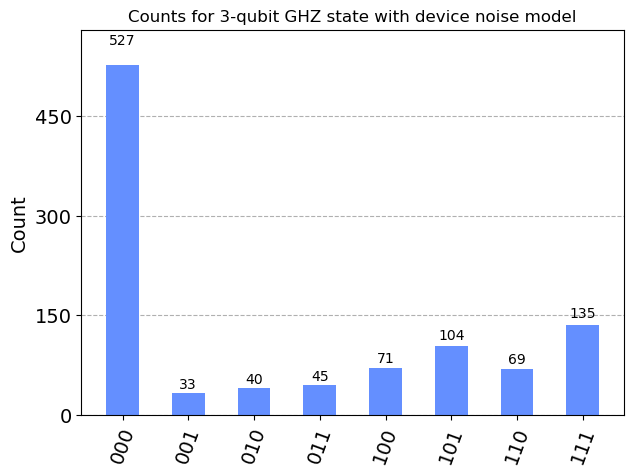

In [17]:
# Execute noisy simulation and get counts
result_noise = sim_noise.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise,
               title="Counts for 3-qubit GHZ state with device noise model")

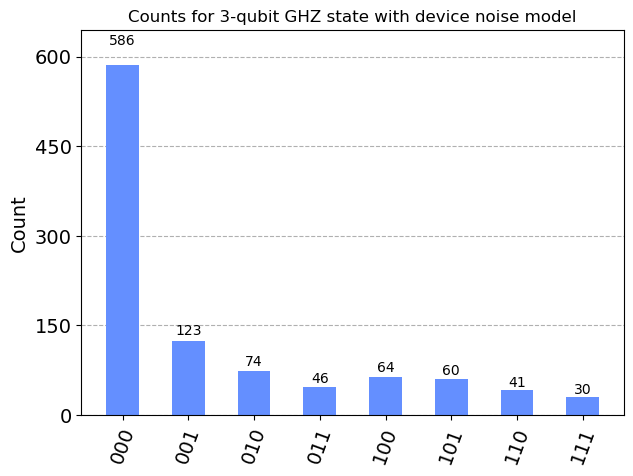

In [18]:
# Execute noisy simulation and get counts
result_noise = sim_vigo.run(circ).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise,
               title="Counts for 3-qubit GHZ state with device noise model")

## T1

In [19]:
circ = QuantumCircuit(1, 1)
circ.x(0)
circ.barrier(0)
circ.delay(1e-2, unit='s')
circ.barrier(0)
circ.measure(0, 0)
circ.draw()

┌───┐ ░ ┌────────────────┐ ░ ┌─┐
  q: ┤ X ├─░─┤ Delay(0.01[s]) ├─░─┤M├
     └───┘ ░ └────────────────┘ ░ └╥┘
c: 1/══════════════════════════════╩═
                                   0

In [20]:
# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)
circ.draw()

global phase: π
     ┌────────────┐ ░ ┌────────────────┐ ░ ┌─┐
  q: ┤ U3(π,-π,0) ├─░─┤ Delay(0.01[s]) ├─░─┤M├
     └────────────┘ ░ └────────────────┘ ░ └╥┘
c: 1/═══════════════════════════════════════╩═
                                            0

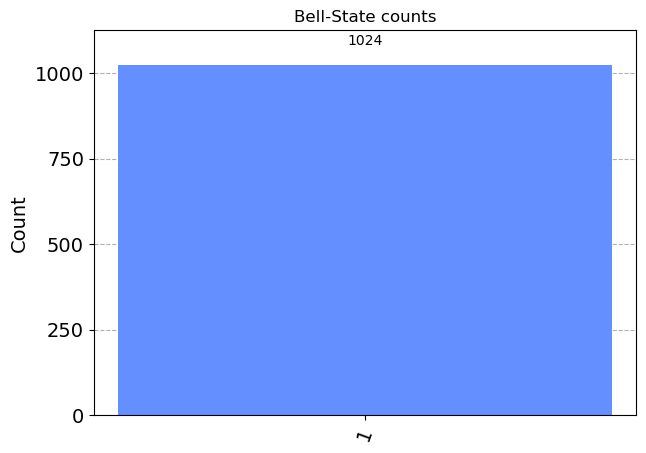

In [21]:
# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [23]:
from qiskit.providers.fake_provider import FakePerth

noise_model = NoiseModel.from_backend(
    FakePerth(), thermal_relaxation=True, gate_error=False, readout_error=False
)

sim_noise = AerSimulator.from_backend(FakePerth(), noise_model=noise_model)
# print(FakePerth().qubit_properties(0).t1)
circ = QuantumCircuit(1, 1)
circ.x(0)
circ.barrier(0)
circ.delay(1e-2, unit='s')
circ.barrier(0)
circ.measure(0, 0)
circ.draw()

┌───┐ ░ ┌────────────────┐ ░ ┌─┐
  q: ┤ X ├─░─┤ Delay(0.01[s]) ├─░─┤M├
     └───┘ ░ └────────────────┘ ░ └╥┘
c: 1/══════════════════════════════╩═
                                   0

In [24]:
# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_noise)
tcirc.draw()

┌───┐ ░ ┌────────────────┐ ░ ┌─┐
      q_0 -> 0 ┤ X ├─░─┤ Delay(0.01[s]) ├─░─┤M├
               └───┘ ░ └────────────────┘ ░ └╥┘
ancilla_0 -> 1 ──────────────────────────────╫─
                                             ║ 
ancilla_1 -> 2 ──────────────────────────────╫─
                                             ║ 
ancilla_2 -> 3 ──────────────────────────────╫─
                                             ║ 
ancilla_3 -> 4 ──────────────────────────────╫─
                                             ║ 
ancilla_4 -> 5 ──────────────────────────────╫─
                                             ║ 
ancilla_5 -> 6 ──────────────────────────────╫─
                                             ║ 
          c: 1/══════════════════════════════╩═
                                             0

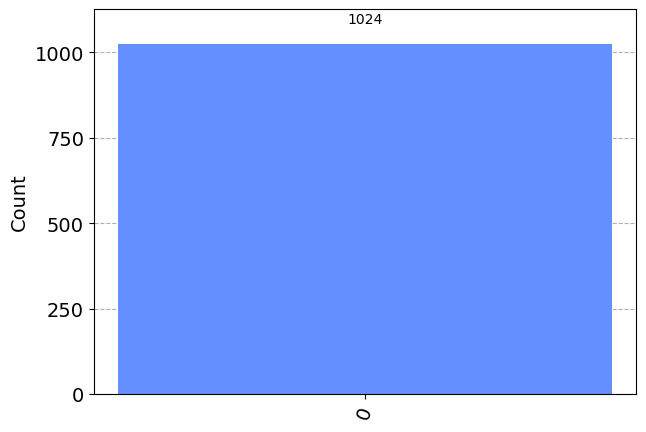

In [26]:
# Run and get counts
result = sim_noise.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='')

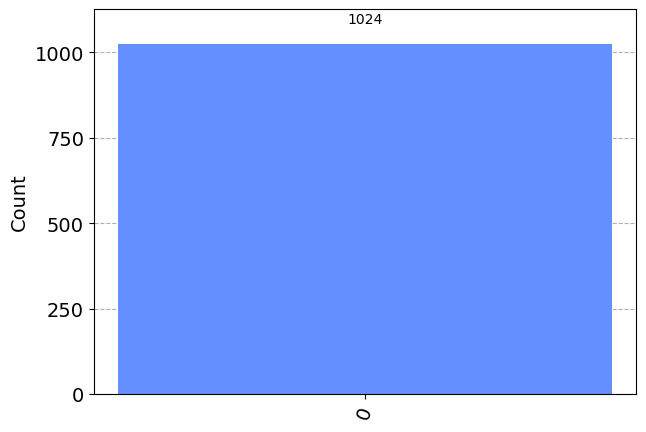

In [27]:
# Run and get counts
result = sim_noise.run(tcirc).result()
counts = result.get_counts(tcirc)
plot_histogram(counts, title='')